In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 1
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.2
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[1_10_51_300_0.2_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[1_10_51_300_0.2_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	2728135.3588

Best Fitness:	289512.2229
Solution:	100.0000
Diff:		289412.2229

[0:01:27][----------] 1.96% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	2530834.8920

Best Fitness:	477267.3327
Solution:	100.0000
Diff:		477167.3327

[0:02:38][----------] 3.92% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	2245233.3179

Best Fitness:	274233.6882
Solution:	100.0000
Diff:		274133.6882

[0:03:48][#---------] 5.88% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	2815863.4354

Best Fitness:	519468.9409
Solution:	100.0000
Diff:		519368.9409

[0:04:56][#---------] 7.84% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	5213938.0013

Best Fitness:	655815.5962
Solution:	100.0000
Diff:		655715.5962

[0:06:04][#---------] 9.80% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	2690150.9923

Best Fitness:	613121.0855
Solution:	100.0000
Diff:		613021.0855

[0:07:14][#---------] 11.76% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	845717.2978

Best Fitness:	86643.1092
Solution:	100.0000
Diff:		86543.1092

[0:08:20][#---------] 13.73% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	2137822.3726

Best Fitness:	253102.4528
Solution:	100.0000
Diff:		253002.4528

[0:09:27][##--------] 15.69% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	2199905.4577

Best Fitness:	441100.8662
Solution:	100.0000
Diff:		441000.8662

[0:10:36][##--------] 17.65% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	2684434.8798

Best Fitness:	467661.8421
Solution:	100.0000
Diff:		467561.8421

[0:11:43][##--------] 19.61% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1223013.6997

Best Fitness:	91845.4323
Solution:	100.0000
Diff:		91745.4323

[0:12:54][##--------] 21.57% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	3421835.7020

Best Fitness:	542824.2581
Solution:	100.0000
Diff:		542724.2581

[0:14:02][##--------] 23.53% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1732454.7398

Best Fitness:	298978.3905
Solution:	100.0000
Diff:		298878.3905

[0:15:10][###-------] 25.49% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	5060466.4500

Best Fitness:	886419.9670
Solution:	100.0000
Diff:		886319.9670

[0:16:20][###-------] 27.45% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	2373934.5536

Best Fitness:	306611.7445
Solution:	100.0000
Diff:		306511.7445

[0:17:29][###-------] 29.41% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1145870.9089

Best Fitness:	138654.7175
Solution:	100.0000
Diff:		138554.7175

[0:18:39][###-------] 31.37% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	3007770.4324

Best Fitness:	379464.1981
Solution:	100.0000
Diff:		379364.1981

[0:19:48][###-------] 33.33% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	2115172.6554

Best Fitness:	433865.0146
Solution:	100.0000
Diff:		433765.0146

[0:20:55][####------] 35.29% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1771160.5726

Best Fitness:	182232.6054
Solution:	100.0000
Diff:		182132.6054

[0:22:03][####------] 37.25% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1543205.3306

Best Fitness:	205649.0301
Solution:	100.0000
Diff:		205549.0301

[0:23:12][####------] 39.22% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	3147359.8462

Best Fitness:	685131.3003
Solution:	100.0000
Diff:		685031.3003

[0:24:21][####------] 41.18% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	3036140.1350

Best Fitness:	221854.7496
Solution:	100.0000
Diff:		221754.7496

[0:25:33][####------] 43.14% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1215930.8249

Best Fitness:	227087.4244
Solution:	100.0000
Diff:		226987.4244

[0:26:42][#####-----] 45.10% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	2284952.5841

Best Fitness:	645705.3854
Solution:	100.0000
Diff:		645605.3854

[0:27:46][#####-----] 47.06% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	4113204.4351

Best Fitness:	564682.5738
Solution:	100.0000
Diff:		564582.5738

[0:28:49][#####-----] 49.02% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	2549236.1019

Best Fitness:	176244.2594
Solution:	100.0000
Diff:		176144.2594

[0:29:51][#####-----] 50.98% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	2351285.4164

Best Fitness:	424785.1956
Solution:	100.0000
Diff:		424685.1956

[0:30:54][#####-----] 52.94% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	776378.0205

Best Fitness:	101573.7697
Solution:	100.0000
Diff:		101473.7697

[0:31:56][#####-----] 54.90% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1542404.9765

Best Fitness:	219734.2271
Solution:	100.0000
Diff:		219634.2271

[0:32:58][######----] 56.86% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1463099.1645

Best Fitness:	249700.6523
Solution:	100.0000
Diff:		249600.6523

[0:34:02][######----] 58.82% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1169682.0768

Best Fitness:	294315.9500
Solution:	100.0000
Diff:		294215.9500

[0:35:04][######----] 60.78% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	2769836.8220

Best Fitness:	478118.1788
Solution:	100.0000
Diff:		478018.1788

[0:36:07][######----] 62.75% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1993300.4497

Best Fitness:	433259.5547
Solution:	100.0000
Diff:		433159.5547

[0:37:10][######----] 64.71% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	4806120.8217

Best Fitness:	756252.4354
Solution:	100.0000
Diff:		756152.4354

[0:38:13][#######---] 66.67% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	2897289.5103

Best Fitness:	371648.1542
Solution:	100.0000
Diff:		371548.1542

[0:39:16][#######---] 68.63% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	3150078.8779

Best Fitness:	345581.1250
Solution:	100.0000
Diff:		345481.1250

[0:40:17][#######---] 70.59% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1918917.6730

Best Fitness:	156726.6276
Solution:	100.0000
Diff:		156626.6276

[0:41:18][#######---] 72.55% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	2082670.4210

Best Fitness:	358920.1071
Solution:	100.0000
Diff:		358820.1071

[0:42:21][#######---] 74.51% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1723338.1774

Best Fitness:	280404.2048
Solution:	100.0000
Diff:		280304.2048

[0:43:24][########--] 76.47% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	2165649.7861

Best Fitness:	377852.3297
Solution:	100.0000
Diff:		377752.3297

[0:44:27][########--] 78.43% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1901440.9092

Best Fitness:	84794.7967
Solution:	100.0000
Diff:		84694.7967

[0:45:29][########--] 80.39% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	2489555.9310

Best Fitness:	288611.5755
Solution:	100.0000
Diff:		288511.5755

[0:46:31][########--] 82.35% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	2794131.2544

Best Fitness:	306602.3563
Solution:	100.0000
Diff:		306502.3563

[0:47:33][########--] 84.31% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	3696507.5668

Best Fitness:	473357.9210
Solution:	100.0000
Diff:		473257.9210

[0:48:37][#########-] 86.27% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	3489377.3402

Best Fitness:	513686.7560
Solution:	100.0000
Diff:		513586.7560

[0:49:42][#########-] 88.24% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	2486364.4624

Best Fitness:	407756.5974
Solution:	100.0000
Diff:		407656.5974

[0:50:45][#########-] 90.20% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	2932717.9416

Best Fitness:	404125.3142
Solution:	100.0000
Diff:		404025.3142

[0:51:54][#########-] 92.16% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1689293.1903

Best Fitness:	295342.1464
Solution:	100.0000
Diff:		295242.1464

[0:52:56][#########-] 94.12% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	3361022.5772

Best Fitness:	566177.6712
Solution:	100.0000
Diff:		566077.6712

[0:53:57][##########] 96.08% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	2987115.1311

Best Fitness:	306520.8417
Solution:	100.0000
Diff:		306420.8417

[0:55:00][##########] 98.04% 


#Generations:	65

#FitnessEvals:	20100

Mean Fitness:	1510016.2969

Best Fitness:	271678.2420
Solution:	100.0000
Diff:		271578.2420

[0:56:09][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

0:56:09

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
60,1.296072e+06,818485.884624,1.848941e+06,2.135497e+06,3.098506e+06,3.339091e+06,2.193058e+06,1.346284e+06,2.125407e+06,3.258154e+06,...,1.401731e+06,1.718542e+06,1.518587e+06,2.687538e+06,1.480197e+06,1.533233e+06,1.482936e+06,4.753816e+06,2.042169e+06,50
61,1.296072e+06,818485.884624,1.848941e+06,2.135497e+06,3.098506e+06,3.339091e+06,2.193058e+06,1.346284e+06,1.636553e+06,3.258154e+06,...,1.401731e+06,1.718542e+06,1.518587e+06,2.687538e+06,1.480197e+06,1.533233e+06,1.482936e+06,4.753816e+06,2.042169e+06,50
62,1.296072e+06,818485.884624,1.848941e+06,2.135497e+06,3.098506e+06,2.422579e+06,2.193058e+06,1.346284e+06,1.636553e+06,1.319390e+06,...,1.401731e+06,1.718542e+06,1.518587e+06,1.182481e+06,1.480197e+06,1.533233e+06,1.482936e+06,4.556157e+06,2.042169e+06,50
63,1.296072e+06,818485.884624,1.848941e+06,2.135497e+06,1.261493e+06,2.422579e+06,2.193058e+06,1.346284e+06,1.636553e+06,1.319390e+06,...,1.401731e+06,1.718542e+06,1.518587e+06,1.182481e+06,1.480197e+06,1.533233e+06,1.482936e+06,4.556157e+06,2.042169e+06,50
64,1.296072e+06,818485.884624,1.848941e+06,2.135497e+06,1.261493e+06,2.422579e+06,2.193058e+06,1.346284e+06,1.636553e+06,1.319390e+06,...,6.475286e+05,1.718542e+06,1.518587e+06,1.182481e+06,1.480197e+06,7.358184e+05,1.482936e+06,9.090534e+05,2.042169e+06,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 289412.22289936186

Best error for run 1: 477167.3326592533

Best error for run 2: 274133.6881853906

Best error for run 3: 519368.94086846046

Best error for run 4: 655715.5962117743

Best error for run 5: 613021.0855305752

Best error for run 6: 86543.10918063542

Best error for run 7: 253002.45275851223

Best error for run 8: 441000.86621425545

Best error for run 9: 467561.8421278397

Best error for run 10: 91745.43226274117

Best error for run 11: 542724.2580956621

Best error for run 12: 298878.39045591274

Best error for run 13: 886319.9669789646

Best error for run 14: 306511.7444868079

Best error for run 15: 138554.71753613412

Best error for run 16: 379364.1980773265

Best error for run 17: 433765.01456678304

Best error for run 18: 182132.6053919705

Best error for run 19: 205549.03007948305

Best error for run 20: 685031.3003431349

Best error for run 21: 221754.7496014747

Best error for run 22: 226987.42435182777

Best error for run 23: 645605.3853896528

Best error for run 24: 564582.5738069953

Best error for run 25: 176144.25943538154

Best error for run 26: 424685.19559255074

Best error for run 27: 101473.76965286149

Best error for run 28: 219634.22708495482

Best error for run 29: 249600.6523460804

Best error for run 30: 294215.94999931636

Best error for run 31: 478018.1787844766

Best error for run 32: 433159.55469674035

Best error for run 33: 756152.4354455596

Best error for run 34: 371548.15422542323

Best error for run 35: 345481.1250340281

Best error for run 36: 156626.62761248133

Best error for run 37: 358820.1071336212

Best error for run 38: 280304.2047566125

Best error for run 39: 377752.32974566024

Best error for run 40: 84694.79671308897

Best error for run 41: 288511.5754620111

Best error for run 42: 306502.35626205883

Best error for run 43: 473257.9209998476

Best error for run 44: 513586.7559667444

Best error for run 45: 407656.5973707126

Best error for run 46: 404025.31421884097

Best error for run 47: 295242.14644101966

Best error for run 48: 566077.6711867534

Best error for run 49: 306420.84169298445

Best error for run 50: 271578.2420077514

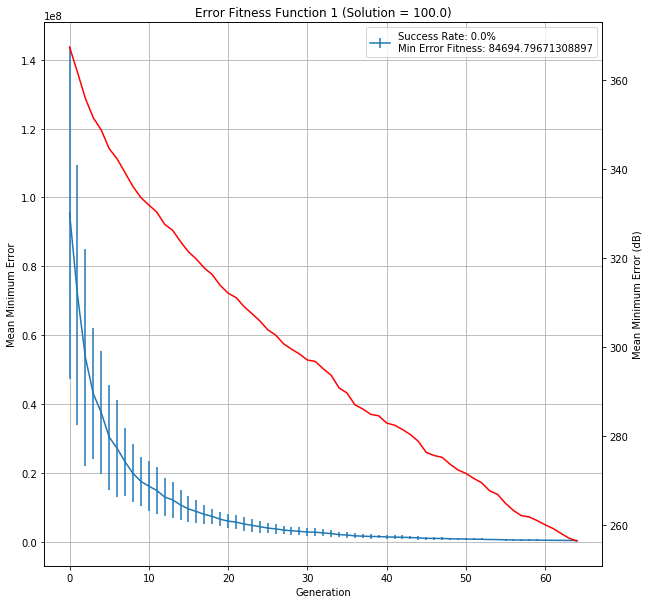

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[1_10_51_300_0.2_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,1,10,0.2,289412.222899,477167.332659,274133.688185,519368.940868,655715.596212,613021.085531,...,513586.755967,407656.597371,404025.314219,295242.146441,566077.671187,306420.841693,271578.242008,369168.723881,0:56:09,20100
